In [41]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from econml.dml import LinearDML
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
with open('../config.yaml', 'r') as file:
    config = yaml.safe_load(stream=file)

df = pd.read_csv(config['data']['path'])
df.head()

,temp,weekday,cost,price,sales
0,17.3,6,1.5,5.6,173
1,25.4,3,0.3,4.9,196
2,23.3,5,1.5,7.6,207
3,26.9,1,0.3,5.3,241
4,20.2,1,1.0,7.2,227


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   temp     10000 non-null  float64
 1   weekday  10000 non-null  int64  
 2   cost     10000 non-null  float64
 3   price    10000 non-null  float64
 4   sales    10000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [44]:
features = ['temp', 'weekday', 'cost']
treatment = 'price'
outcome = 'sales'

In [45]:
m1 = LinearDML(
    model_t=GradientBoostingRegressor(),
    model_y=GradientBoostingRegressor(),
    cv=3,
    random_state=1
)

In [46]:
m1.fit(
    Y=df[outcome],
    T=df[treatment],
    X=df[features]
)

In [47]:
df['effect'] = m1.const_marginal_effect(df[features])
df.head(10)

,temp,weekday,cost,price,sales,effect
0,17.3,6,1.5,5.6,173,-3.772796
1,25.4,3,0.3,4.9,196,-4.417225
2,23.3,5,1.5,7.6,207,-3.144421
3,26.9,1,0.3,5.3,241,-4.184798
4,20.2,1,1.0,7.2,227,-3.926219
5,26.1,6,0.5,6.6,193,-4.217451
6,25.0,6,0.3,4.9,191,-4.585388
7,18.5,5,0.5,3.9,189,-4.915818
8,30.1,3,1.0,6.5,208,-3.046524
9,19.8,5,0.3,5.4,167,-5.049624


In [48]:
df['effect'].describe().T

count    10000.000000
mean        -3.918897
std          0.720202
min         -5.927615
25%         -4.479783
50%         -3.977317
75%         -3.372411
max         -1.790118
Name: effect, dtype: float64

In [57]:
df['effect_bin'] = pd.qcut(df['effect'], 3, labels=['low', 'medium', 'high'])
df['weekend'] = np.select([df['weekday'] == 1, df['weekday'] == 7], [1, 1], 0)

In [58]:
df.groupby(by='effect_bin')[['effect']].mean()

C:\Users\ccino\AppData\Local\Temp\ipykernel_14804\1446408155.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by='effect_bin')[['effect']].mean()


,effect
effect_bin,
low,-4.699931
medium,-3.973570
high,-3.082955


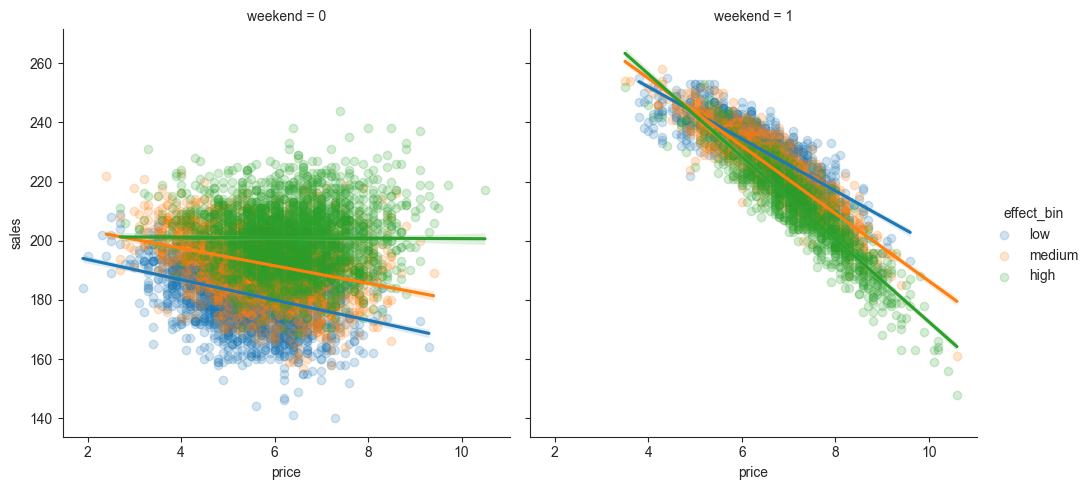

In [71]:
sns.set_style('ticks')
sns.lmplot(data=df, x='price', y='sales', hue='effect_bin', col='weekend', scatter_kws={'alpha':0.2})

In [81]:
df_ord = df.sort_values(by='effect')
df_sum = df['effect'].cumsum()
sizes = np.array(range(len(df_sum))) + 1
df_sum /= sizes
df_sum

0      -3.772796
1      -4.095010
2      -3.778147
3      -3.879810
4      -3.889092
          ...   
9995   -3.918684
9996   -3.918723
9997   -3.918819
9998   -3.918803
9999   -3.918897
Name: effect, Length: 10000, dtype: float64

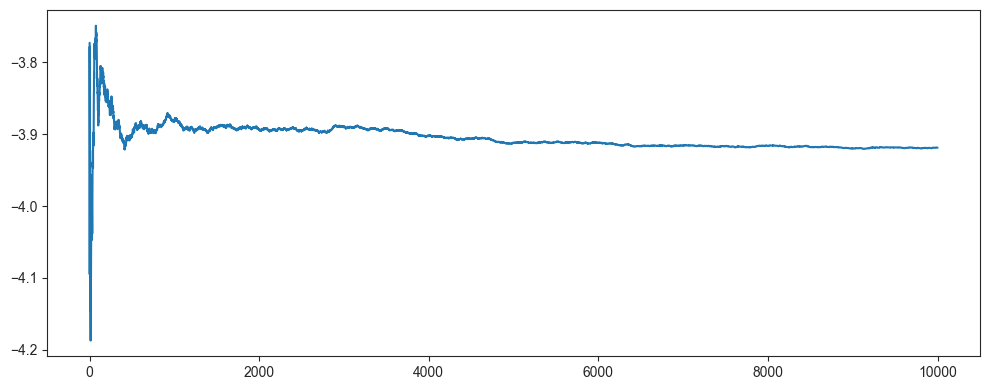

In [85]:
plt.figure(figsize=(10, 4))
plt.plot(
    sizes,
    df_sum
)
plt.tight_layout()